# Advanced Machine Learning

## Homework 2

### Exercice 1 - Imagenet

1) ImageNet is website offering collection of image datasets that are human-labeled, typically created for training models on image recognition. Each node is composed of approximately 500 images on average

2) We can find 30 synsets for 'cheese'

3) The BDAT team won the 2017 challenge, this is how they depict their Dual path networks and Basic ensemble methods: 

Adaptive attention[1] and deep combined convolutional models[2,3] are used for LOC task.

Scale[4,5,6], context[7], sampling and deep combined convolutional networks[2,3] are considered for DET task. Object density estimation is used for score re-rank. 

### Exercice 2 - Build an image recognition system

1) Importing keras module and pretrained model

In [1]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from PIL import Image
from keras.applications import InceptionV3
from keras.models       import Model
import numpy as np

Using TensorFlow backend.


2) Checking architecture:

In [ ]:
model = ResNet50(weights='imagenet')
model.summary()

3) Checking single object

In [16]:
img = Image.open("dog.0.jpg")

4) Image reshaping

In [17]:
target_size = (224, 224)
img = img.resize(target_size) 
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

5) Pre-processing

In [18]:
x = preprocess_input(x)

6) Model predictions

In [19]:
preds = model.predict(x)

7) Checking results

In [20]:
decode_predictions(preds, top=5)[0]

40960/35363 [==================================] - 0s 3us/step


[('n02092002', 'Scottish_deerhound', 0.21568878),
 ('n02097298', 'Scotch_terrier', 0.15740103),
 ('n02110627', 'affenpinscher', 0.13003176),
 ('n02102318', 'cocker_spaniel', 0.077052005),
 ('n02097130', 'giant_schnauzer', 0.07410096)]

# Exercice 3 - My turn

In [2]:
from keras.applications import MobileNetV2
from keras.applications import InceptionV3
from keras.models       import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,GlobalAveragePooling2D
from keras.optimizers import Adadelta, Adagrad, Nadam, Adam, SGD
from keras.models import load_model
#from keras.applications.InceptionV3 import preprocess_input

import matplotlib.pyplot as plt

In [3]:
train_dir = "train_dir"
val_dir = "val_dir"

1) Binary classifier using transfer learning and fine tuning

a. I will choose cats and dogs for my binary classification.

b. I will always proceed in the following way :
    - 1. Import and build model
    - 2. Load the data
    - 3. Train the model on the data
    - 4. Check accurarcy, generalization error etc..

## MobileNetV2

1. Build model

In [6]:
base_model=MobileNetV2(weights='imagenet',include_top=False)  

x=base_model.output
x=GlobalAveragePooling2D()(x)
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)

/Users/laks/anaconda3/lib/python3.6/site-packages/keras_applications/mobilenet_v2.py:315: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


Given that we are using transfer learning, we will only train the last layers we've addded

In [16]:
for layer in model.layers:
    layer.trainable=False

In [95]:
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [21]:
for layer in model.layers[:315]:
   layer.trainable = False
for layer in model.layers[315:]:
   layer.trainable = True

2. Loading the data

In [20]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2)
validation_data_generator = ImageDataGenerator(rescale=1./255)

training_generator = training_data_generator.flow_from_directory(
    train_dir,
    color_mode='rgb',
    target_size=(224, 224),
    batch_size=12,
    class_mode="categorical")

validation_generator = validation_data_generator.flow_from_directory(
    val_dir,
    color_mode='rgb',
    target_size=(224, 224),
    batch_size=12,
    class_mode="categorical")

Found 251 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


3. Training the model

I will be using the Adadelta optimizer based on a moving window of gradient updates, which means it will learn even after updating gradients.

In [22]:
nb_validation_samples = 61
top_epochs = 15
batch_size = 12

model.compile(optimizer='Nadam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size = training_generator.n//training_generator.batch_size
model_MobileNetV2 = model.fit_generator(generator=training_generator,
                                        steps_per_epoch=step_size,
                                        validation_data = validation_generator,
                                        validation_steps = nb_validation_samples / batch_size,
                                        epochs = 10)

Epoch 1/10
20/20 [==============================] - 42s 2s/step - loss: 1.3659 - acc: 0.5356 - val_loss: 1.5464 - val_acc: 0.4262
Epoch 2/10
20/20 [==============================] - 36s 2s/step - loss: 1.4013 - acc: 0.5276 - val_loss: 1.5464 - val_acc: 0.4262
Epoch 3/10
20/20 [==============================] - 37s 2s/step - loss: 1.3241 - acc: 0.5311 - val_loss: 1.5464 - val_acc: 0.4262
Epoch 4/10
20/20 [==============================] - 36s 2s/step - loss: 1.4386 - acc: 0.5000 - val_loss: 1.5464 - val_acc: 0.4262
Epoch 5/10
20/20 [==============================] - 35s 2s/step - loss: 1.2793 - acc: 0.5651 - val_loss: 1.5464 - val_acc: 0.4262
Epoch 6/10
20/20 [==============================] - 35s 2s/step - loss: 1.3336 - acc: 0.5428 - val_loss: 1.5464 - val_acc: 0.4262
Epoch 7/10
20/20 [==============================] - 35s 2s/step - loss: 1.5011 - acc: 0.4644 - val_loss: 1.5464 - val_acc: 0.4262
Epoch 8/10
20/20 [==============================] - 35s 2s/step - loss: 1.2600 - acc: 0.57

4. Looking at accuracy

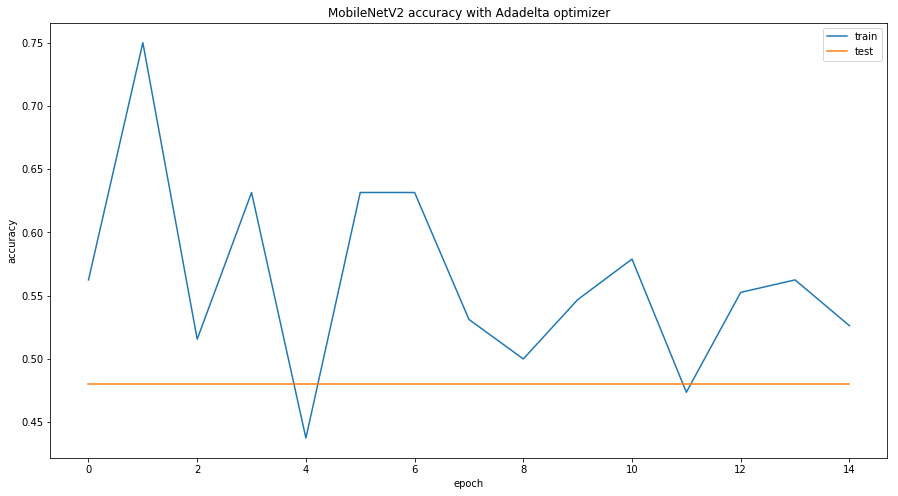

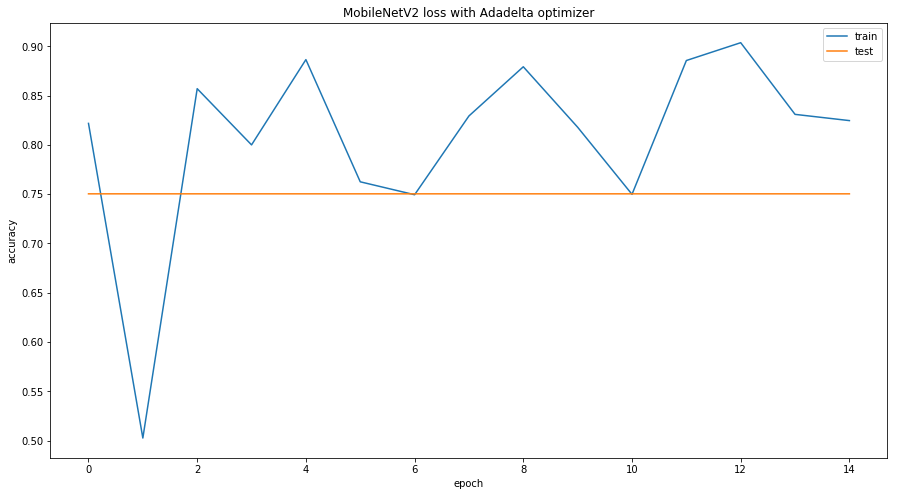

In [78]:
plt.figure(figsize=(15, 8))
plt.plot(model_MobileNetV2.history['acc'])
plt.plot(model_MobileNetV2.history['val_acc'])
plt.title('MobileNetV2 accuracy with Adadelta optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.figure(figsize=(15, 8))
plt.plot(model_MobileNetV2.history['loss'])
plt.plot(model_MobileNetV2.history['val_loss'])
plt.title('MobileNetV2 loss with Adadelta optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

It seems as though the optimization problem is stuck at a local minimum, but when using Nadam (Momentum optimizer from Nesterov's method) we do not get better results

## Inception V3 

Inception V3 was one of the convolutional neural nets that got one of the best accruaracies in the 2012 Imagenet competition. It combines inception modules (to increase sparsity) and residual blocks (to learn deeper layers) to improve fine-tuning and detect more specific patterns

### Transfer learning:

1. Build model

In [4]:
base_model=InceptionV3(weights='imagenet',include_top=False)  

In [6]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
#x=Dense(1024,activation='relu')(x) 
#x=Dense(1024,activation='relu')(x)
#x=Dense(512,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x) 
model=Model(inputs=base_model.input,outputs=preds)

Let's have a look at the layers of InceptionV3 net

In [17]:
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

Since we are using transfer learning, we freeze all the layers that we've imported (they have already been trained and we decide to not re-ajust them on our data) except the two last ones for our data (310 original layers, we add two so we range on 0 to 311 to freeze). 

In [29]:
for layer in model.layers[:311]:
    layer.trainable=False
for layer in model.layers[311:]:
    layer.trainable=True

2) Loading data

In [30]:
train_datagen=ImageDataGenerator(rescale=1./299,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./299)

train_generator  =train_datagen.flow_from_directory(train_dir,
                                                 target_size=(299,299),
                                                 color_mode='rgb',
                                                 batch_size=40,
                                                 class_mode='categorical',
                                                 shuffle=False)

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                 target_size=(299,299),
                                                 color_mode='rgb',
                                                 batch_size=40,
                                                 class_mode='categorical',
                                                 shuffle=False)

Found 251 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


3) Training the model

There are certain specificities to the InceptionV3, for example given we pass the argument include_top to False we must input and img shape of (299,299). I chose a batch size of 40 as I can allow my program to run for a certain while, and it still isn't too much compared to my train sample (251 images). Also since we're only training 2 layers, it's reasonnable to consider that amount of batches I'd say. I'll allow 5 epochs and check afterwards if allowing more might be necessary.

In [31]:
img_width, img_height = 299, 299
nb_train_samples = 251
nb_validation_samples = 61
top_epochs = 5
batch_size = 40

We will use the Adam optimizer that ressembles the rmrprop optimizer, it uses momentum as to avoid being stuck at a local minimum. I'll keep the default settings for this parameter and afterwards check if I have to modify the momentum value (by default it's 0.9) and even the learning rate. 

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size

model_InceptionV3 = model.fit_generator(
train_generator,
    steps_per_epoch = nb_train_samples / batch_size,
    epochs = top_epochs#,
#    validation_data = validation_generator,
#    validation_steps = nb_validation_samples / batch_size
)

Epoch 1/5
3/6 [=============>................] - ETA: 2:57 - loss: 1.0992 - acc: 0.4159

Now that we've got the training accuracy we need to check how good my model is in predicting a new dataset (my test split), as a very accurate model on my train set but lousy on my test set is pointless as it is equivalent to overfitting.

4. Checking accuracy

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(model_InceptionV3.history['acc'])
plt.title('MobileNetV2 accuracy with Adam optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train', loc='best')

plt.figure(figsize=(15, 8))
plt.plot(model_InceptionV3.history['loss'])
plt.title('MobileNetV2 loss with Adam optimizer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('train', loc='best')

In [ ]:
y_pred = model.predict(X_test)

We're obviously off given our results displayed above, and this is where fine-tuning comes into play to retrieve an optimal model!
Let's try freezing the majority of the layers and update only the last layers (we recall there was 315 layers in InceptionV3):

In [35]:
base_model=InceptionV3(weights='imagenet',include_top=False)  

In [41]:
for layer in model.layers[:220]:
   layer.trainable = False
for layer in model.layers[220:]:
   layer.trainable = True

In [42]:
img_width, img_height = 299, 299
nb_train_samples = 251
nb_validation_samples = 61
top_epochs = 5
batch_size = 12

Then using SGD with a low learning rate (lr = 0.0001) we get:

In [43]:
train_datagen=ImageDataGenerator(rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator  =train_datagen.flow_from_directory(train_dir,
                                                 target_size=(299,299),
                                                 color_mode='rgb',
                                                 batch_size=12,
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                 target_size=(299,299),
                                                 color_mode='rgb',
                                                 batch_size=12,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 251 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


In [45]:
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics= ['accuracy'])

In [46]:
model_InceptionV3_2 = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples / batch_size,
    epochs = top_epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples / batch_size
)

Epoch 1/5
21/20 [==============================] - 98s 5s/step - loss: 1.2620 - acc: 0.5253 - val_loss: 1.2199 - val_acc: 0.4262
Epoch 2/5
21/20 [==============================] - 76s 4s/step - loss: 1.2649 - acc: 0.5296 - val_loss: 1.2199 - val_acc: 0.4262
Epoch 3/5
21/20 [==============================] - 76s 4s/step - loss: 1.2773 - acc: 0.5303 - val_loss: 1.2199 - val_acc: 0.4262
Epoch 4/5
21/20 [==============================] - 69s 3s/step - loss: 1.2457 - acc: 0.5306 - val_loss: 1.2199 - val_acc: 0.4262
Epoch 5/5
10/20 [=============>................] - ETA: 33s - loss: 1.2174 - acc: 0.5333

KeyboardInterrupt: 

Once we've finetuned our model and we're satisfied we save it:

In [74]:
model.save('V3model3.h5')

In [ ]:
model = load_model("V3model2.h5")